# Data Scientist Associate Case Study

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

#### Observation
- Missing values in `Extra Features`, `Comfort`, `Maintenance cost` and `Value for Money`.
- In `Owned for` column, `"> 6 months"` and `"<= 6 months"` both represents ownership, causing unecessary confusion.

#### Strategy
- For each rating columns, replaced NAs with zeros.
- For `Owned for` column, renamed it as `Ownership`, combined `"> 6 months"` and `"<= 6 months"` as `"Owned"`.

In [37]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here... 
import pandas as pd
import numpy as np
#read moped.csv
df = pd.read_csv("data/moped.csv")
df.head()

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


In [38]:
#obtain general info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [39]:
#get descriptive statistics of df
df.describe()

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,183.000000,510.000000,176.000000,370.00000
mean,3.768583,3.314165,2.928962,3.650980,3.392045,3.37027
std,1.359949,1.584523,1.637602,1.404368,1.389653,1.52688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,3.000000,2.000000,1.000000,3.000000,2.000000,2.00000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,4.00000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [40]:
#fill nas with 0 for columns from "Extra Features" to "Value for Money"
df.fillna(0, inplace=True)
#check the result
df.isna().sum()

Used it for         0
Owned for           0
Model Name          0
Visual Appeal       0
Reliability         0
Extra Features      0
Comfort             0
Maintenance cost    0
Value for Money     0
dtype: int64

In [41]:
#validate each columns against the reference sheet
df.value_counts(["Used it for", "Owned for"])

Used it for  Owned for  
Commuting    > 6 months     240
             <= 6 months    232
             Never owned     81
Leisure      <= 6 months     56
             Never owned     54
             > 6 months      50
dtype: int64

In [42]:
#combine "> 6 months" and "<= 6 months" into "Owned"
#discard old column
df["Owned for"] = df["Owned for"].replace(["> 6 months", "<= 6 months"], "Owned")
df = df.rename(columns={"Owned for":"Ownership"})
#check the result
df.value_counts(["Ownership", "Used it for"])

Ownership    Used it for
Owned        Commuting      472
             Leisure        106
Never owned  Commuting       81
             Leisure         54
dtype: int64

In [43]:
#check the result
df.head()

,Used it for,Ownership,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,0.0,4.0,0.0,1.0
1,Leisure,Owned,TVS iQube,3.0,1.0,0.0,3.0,0.0,3.0
2,Commuting,Owned,TVS iQube,4.0,4.0,0.0,5.0,0.0,2.0
3,Commuting,Owned,TVS iQube,1.0,1.0,0.0,1.0,0.0,1.0
4,Commuting,Owned,TVS iQube,3.0,4.0,0.0,3.0,0.0,2.0


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

#### Data Manipulation
- Splited and expanded `Model Name` into `Brand` and `Model`
- calculated difference between highest rating and lowest rating in each review (`diff`)
- calculated average rating of each review (`mean`)
- calculated average rating of each brand (`brand_mean`)
- counted number of model in each brand (`n_prod`)
- counted the number of review of each model (`review`)
- counted the number of rating that is zero (`zero_rat`)
- calculated the product of `Visual Appeal`, `Reliability` and `zero_rat` (`vis_rel_zero`)
- determined the model with most reviewed in each brand (`most_rev`)
#### Visualisation
- bar plot shows the counting of top-10 reviewed brand *(1-variable graph)*
- histogram shows the distribution of average rating *(1-variable graph)*
- Pair plot (ECDF plots and scatter plot) shows the distribution of average rating of brands *(6-variable graph)*
- ECDF plot shows distribution of `vis_rel_zero` *(2-variable graph)*
#### Observation
- Most reviewed brand is `Hero` with over 200 reviews, which is almost a double of 
the second-most reviewed brand, `Okinawa`. Reviews from these two companies comprises 
over 50% of the original dataset.
- The median of average rating is below 2.5, this may be due to the large amount of non-rated categories.
- From the pair plot, except `Value for Money` column, companies with lower than 80% ownership, i.e. 
$\frac{owned}{total}$, have genrally higher average rating then its counterpart. In columns like `Visual Appeal`, `Reliability` and `Value for Money`, the difference between the two is siginificant.
- From ECDF plot of `vis_rel_zero`, fake comments show higher average value then real comments do.

In [44]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#strip the brand and model name of motorcycle
df["Splited"] = df["Model Name"].str.split()
df["Brand"] = [i[0] for i in df["Splited"].values]
df["Model"] = [" ".join(i[1:]) for i in df["Splited"].values]
df.drop(columns=["Splited","Model Name"], axis=1, inplace=True)
print(df["Brand"].unique())
print(df["Model"].unique())

['TVS' 'Revolt' 'Bajaj' 'OLA' 'Ather' 'Hero' 'Tork' 'Bounce' 'Ampere'
 'Okinawa' 'Benling' 'PURE' 'Odysse' 'Joy' 'Evolet' 'Yo' 'BGauss'
 'Gemopai' 'Techo' 'e-bike']
['iQube' 'RV 400' 'Chetak' 'S1 Pro' '450X' 'Electric Optima' 'Kratos' 'S1'
 'Infinity E1' 'Electric Optima CX' 'Electric Flash' 'Magnus EX' 'RV 300'
 'Electric Photon' 'Praise' 'Aura' 'Magnus Pro' 'EV EPluto 7G' 'REO'
 'Evoqis' 'i-Praise' 'e-bike Monster' 'EV ETrance Neo' 'Polo' 'Ridge Plus'
 'Zeal' 'Electric Atria' 'Lite' 'Electric NYX' 'R30' 'Drift' 'B8'
 'e-bike Wolf' 'Astrid Lite' 'Electra Emerge' 'Electra Raptor' 'Gen Nxt'
 'Ryder']


In [46]:
#greatest difference in rating, except zero rating
rating = df.iloc[:,2:8]
df["diff"] = rating.max(axis=1) - rating.min(axis=1)
df["diff"].value_counts()

5.0    375
4.0    166
3.0     78
1.0     59
2.0     35
Name: diff, dtype: int64

In [47]:
#mean of rating
df["mean"] = rating.mean(axis=1)
df.groupby("Ownership")["mean"].describe()

,count,mean,std,min,25%,50%,75%,max
Ownership,,,,,,,,
Never owned,135.0,2.451852,0.691055,0.5,2.166667,2.500000,3.166667,3.333333
Owned,578.0,2.106690,0.897800,0.5,1.333333,2.166667,2.833333,3.333333


In [48]:
#brand aggregate mean
brand_agg_mean = df.groupby("Brand")["mean"].agg('mean').sort_values().reset_index(name="brand_mean")
print(brand_agg_mean.head().T)
df = df.merge(brand_agg_mean, on="Brand")

                   0         1         2         3         4
Brand         BGauss       Joy       OLA    Bounce   Benling
brand_mean  0.833333  1.619048  1.945736  1.966667  1.973684


In [49]:
#obtain number of model for each company
n_prod = df.groupby("Brand")["Model"].nunique().sort_values(ascending=False).reset_index(name="n_prod")
df = df.merge(n_prod, on="Brand")

In [50]:
#obtain review count for each model
review_num = df.value_counts("Model").sort_values(ascending=False).reset_index(name="review")
df = df.merge(review_num, "left", on="Model")

In [51]:
#no. of zero rated in each review
df["zero_rat"] = rating[rating==0].count(axis=1)
#check the difference between owenrship in terms of proportion
df.groupby("Ownership")["zero_rat"].value_counts(normalize=True)

Ownership    zero_rat
Never owned  2           0.592593
             3           0.377778
             4           0.029630
Owned        2           0.792388
             3           0.193772
             4           0.013841
Name: zero_rat, dtype: float64

In [52]:
#product of visual appeal, reliability and no. of zero rating
df["vis_rel_zero"] = df[["Visual Appeal","Reliability", "zero_rat"]].prod(axis=1)
print(df.groupby("Ownership")["vis_rel_zero"].describe())

             count       mean       std  min   25%   50%   75%    max
Ownership                                                            
Never owned  135.0  44.711111  19.59282  2.0  32.0  48.0  50.0  100.0
Owned        578.0  29.250865  21.43632  2.0   8.0  30.0  50.0  100.0


In [53]:
#find the most reviewed model in each brand
most_reviewed = pd.DataFrame(df.groupby("Brand")[["Model", "review"]].max().reset_index())
df["most_rev"] = df["Model"].isin(most_reviewed["Model"])
print(df["most_rev"].value_counts())
# sns.countplot(x="most_rev", data=df, hue="Ownership")
# plt.show()

False    424
True     289
Name: most_rev, dtype: int64


In [54]:
#check the result
df.head()

,Used it for,Ownership,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,Brand,Model,diff,mean,brand_mean,n_prod,review,zero_rat,vis_rel_zero,most_rev
0,Commuting,Never owned,3.0,4.0,0.0,4.0,0.0,1.0,TVS,iQube,4.0,2.000000,2.127451,1,17,2,24.0,True
1,Leisure,Owned,3.0,1.0,0.0,3.0,0.0,3.0,TVS,iQube,3.0,1.666667,2.127451,1,17,2,6.0,True
2,Commuting,Owned,4.0,4.0,0.0,5.0,0.0,2.0,TVS,iQube,5.0,2.500000,2.127451,1,17,2,32.0,True
3,Commuting,Owned,1.0,1.0,0.0,1.0,0.0,1.0,TVS,iQube,1.0,0.666667,2.127451,1,17,2,2.0,True
4,Commuting,Owned,3.0,4.0,0.0,3.0,0.0,2.0,TVS,iQube,4.0,2.000000,2.127451,1,17,2,24.0,True


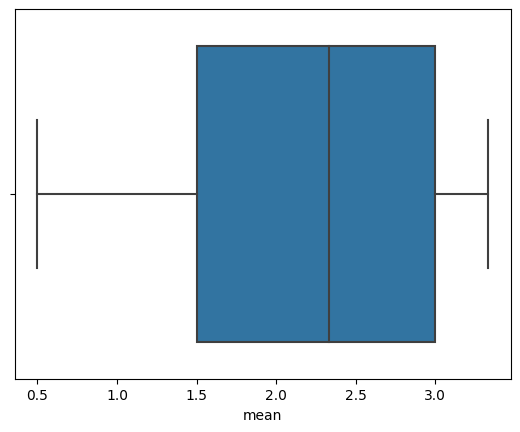

In [55]:
#histogram shows the distribution of mean of review
sns.boxplot(x="mean", data=df)
plt.show()

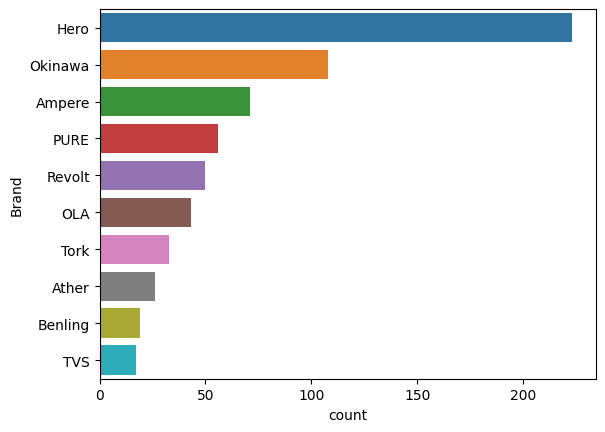

In [56]:
#bar chart shows distribution of top-10 reviewed brand
top_ten = df.value_counts("Brand").index.values[:10]
sns.countplot(y="Brand", data=df, order=top_ten)
plt.show()

In [57]:
#calculate mean rating, percentage of ownership of each brand
rat_own = pd.concat([rating, df[["Ownership", "Brand"]]], axis=1)
rat_own["Ownership"].replace({"Never owned":0, "Owned":1}, inplace=True)
rat_own_brand = rat_own.groupby("Brand").agg('mean')
rat_own_brand["80pct_owner"] = rat_own_brand["Ownership"].ge(0.8)
rat_own_brand.drop("Ownership", axis=1, inplace=True)
rat_own_brand.head()

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,80pct_owner
Brand,,,,,,,
Ampere,3.676056,3.000000,0.450704,2.661972,0.647887,2.478873,True
Ather,3.192308,2.500000,0.000000,3.038462,0.000000,2.461538,True
BGauss,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,True
Bajaj,4.000000,3.384615,0.384615,3.307692,0.384615,0.384615,False
Benling,4.105263,3.315789,0.000000,3.789474,0.000000,0.631579,True


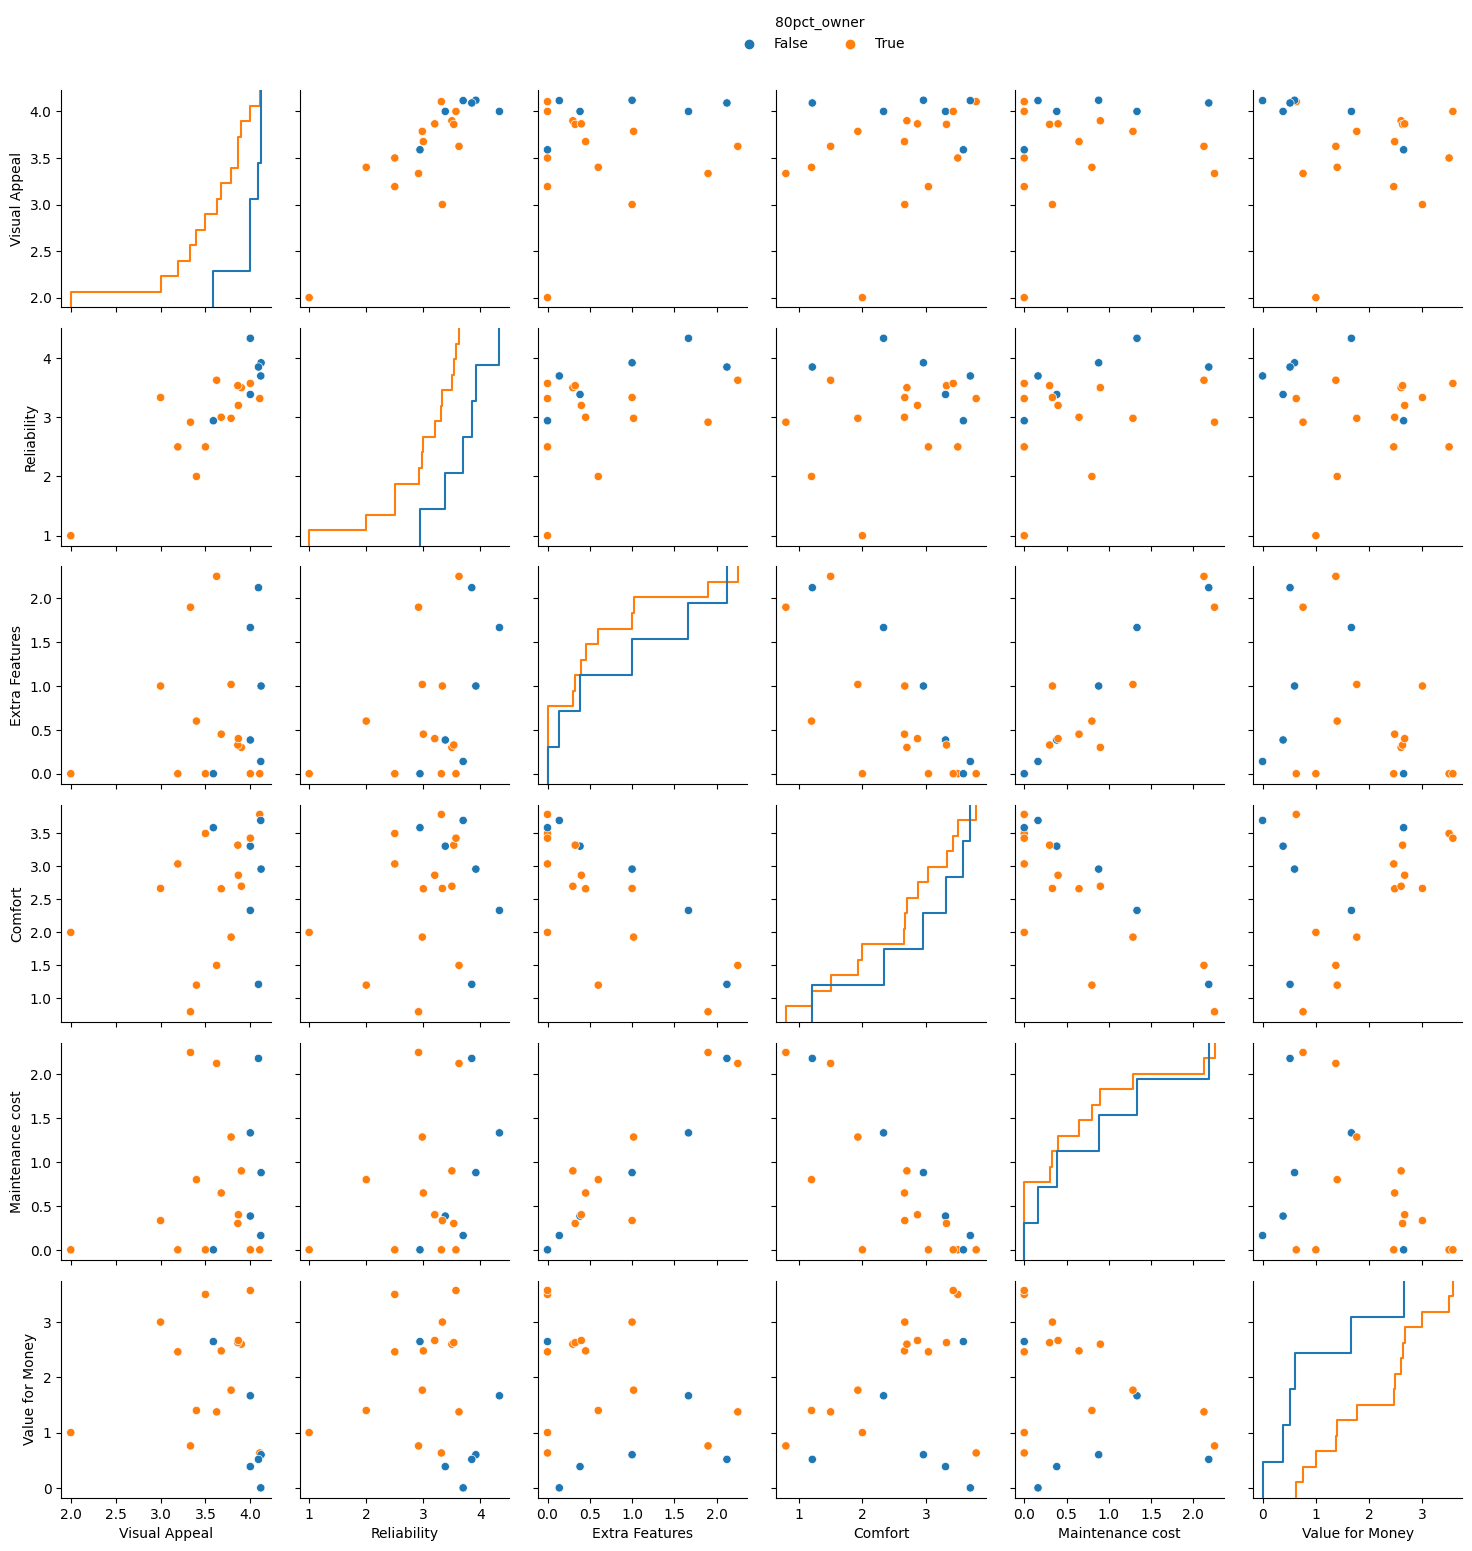

In [58]:
# scatter plot and kde plot across different rating categories
_ = sns.PairGrid(rat_own_brand, hue="80pct_owner")
_.map_diag(sns.ecdfplot)
_.map_offdiag(sns.scatterplot)
_.add_legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=2)
plt.show()

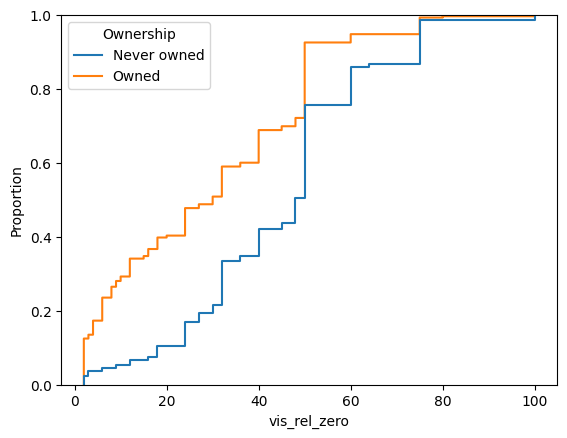

In [59]:
# ecdf plot shows the distribution of vis_rel_zero
sns.ecdfplot(x="vis_rel_zero", data=df, hue="Ownership")
plt.show()

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

The task can be defined as a binary classification problem, which predicts the review is made by a owner (real review) or non-owner (fake review).

For baseline model, a dummy classifier of uniform guessing will be used, as it shows the prediction ability without the exploitation of data that can set the benchmark for later comparison.

For comparison model, a decision tree classifier will be used, as it provides an explaninable prediction process which may suggest insight for further research.

### Data Selection and Train-Test-Split

In [60]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 
#import sklearn libraries
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.metrics import confusion_matrix, PrecisionRecallDisplay, f1_score
from sklearn.model_selection import GridSearchCV

In [61]:
df.columns

Index(['Used it for', 'Ownership', 'Visual Appeal', 'Reliability',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Brand', 'Model', 'diff', 'mean', 'brand_mean', 'n_prod', 'review',
       'zero_rat', 'vis_rel_zero', 'most_rev'],
      dtype='object')

In [62]:
#rearrange columns
df = pd.concat((df.loc[:,"Visual Appeal":"Value for Money"], df.loc[:,"diff":"vis_rel_zero"], 
df[["most_rev", "Used it for", "Brand", "Model","Ownership"]]), axis=1)

In [63]:
#One-hot encode categorical variables
X_cat = df.loc[:, ["most_rev", "Used it for"]]
X_cat = pd.get_dummies(X_cat, drop_first=True)

#combine with ordinal variables, standardise the features
X_ord = df.loc[:,"Visual Appeal":"vis_rel_zero"]
X = pd.concat([X_ord, X_cat], join="outer", axis=1)

#transform label to binary serires
#note that positive = never owned = 1
y = df.loc[:,"Ownership"]
y = y.map({"Never owned":1, "Owned":0})

#check the result
print(X.shape, y.shape)
X.head()

(713, 15) (713,)


,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,diff,mean,brand_mean,n_prod,review,zero_rat,vis_rel_zero,most_rev,Used it for_Leisure
0,3.0,4.0,0.0,4.0,0.0,1.0,4.0,2.000000,2.127451,1,17,2,24.0,True,0
1,3.0,1.0,0.0,3.0,0.0,3.0,3.0,1.666667,2.127451,1,17,2,6.0,True,1
2,4.0,4.0,0.0,5.0,0.0,2.0,5.0,2.500000,2.127451,1,17,2,32.0,True,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.666667,2.127451,1,17,2,2.0,True,0
4,3.0,4.0,0.0,3.0,0.0,2.0,4.0,2.000000,2.127451,1,17,2,24.0,True,0


In [64]:
#split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1023, stratify=y)
#check the poprotion of positive class in both train and test set
print(X_train.shape, y_train.shape)
print(f"Proportion of positve calss in train set is {np.round(y_train.value_counts(normalize=True)[1]*100, 1)}%")
print(f"Proportion of positve calss in test set is {np.round(y_test.value_counts(normalize=True)[1]*100, 1)}%")

(499, 15) (499,)
Proportion of positve calss in train set is 18.8%
Proportion of positve calss in test set is 19.2%


### My Evalution Function

In [65]:
#function plots learning curve
def plot_learning_curve(x, y, est, sc='f1', cv=5):
    train_sizes, train_scores, test_scores= learning_curve(estimator=est, X=x, y=y, scoring=sc, cv=cv,\
        train_sizes=np.linspace(0.1, 1.0, 5))
    train = pd.DataFrame(index=train_sizes, data=train_scores, columns=range(5))
    train = train.stack().reset_index(level=0).rename(columns={"level_0":"size", 0:"score"}).reset_index(drop=True)
    test = pd.DataFrame(index=train_sizes, data=test_scores, columns=range(5))
    test = test.stack().reset_index(level=0).rename(columns={"level_0":"size", 0:"score"}).reset_index(drop=True)
    sns.lineplot(data=train, x="size", y="score", label=f'Training {sc}', marker='o')
    sns.lineplot(data=test, x="size", y="score", label=f'Testing {sc}', marker='o')
    plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=2)
    plt.xlabel('Number of sample')
    plt.ylabel("Score")
    plt.ylim([0,1])
    plt.show()
    return

In [66]:
#function plots validation curve in log scale
def plot_valid_curve(x, y, est, params, sc='f1', cv=5):
    for key, val in params.items():
        p_name = key
        p_range = val
    train_scores, test_scores = validation_curve(
        X = x,
        y = y,
        estimator= est,
        param_name = p_name,
        param_range = p_range,
        scoring = sc,
        cv = cv
    )
    sns.lineplot(x=p_range, y=np.mean(train_scores, axis=1), label=f'Training {sc}', marker='o')
    sns.lineplot(x=p_range, y=np.mean(test_scores, axis=1), label=f'Validation {sc}', marker='o')
    plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=2)
    if p_name[-1] =='C':
        plt.xscale('log')
    plt.xlabel(p_name)
    plt.ylabel("Score")
    plt.ylim([0,1])
    plt.show()
    return

In [67]:
#function contains evaluation metrics
def my_report(x, y, y_p, est):
    print("Confusion matrix: \n {}".format(confusion_matrix(y,y_p)))
    print(f"Training f1 score is {np.round(f1_score(y,y_p),3)}")
    cv_list = cross_val_score(est,x,y,scoring='f1',cv=5)
    print(f"Cross-validated f1 score is {np.round(np.mean(cv_list),3)} +/- {np.round(np.std(cv_list),3)}")
    PrecisionRecallDisplay.from_estimator(est, x, y)
    plt.show()
    return

In [68]:
#feature importances by permutation
#copied from sklearn documentation
def pfi(est, x, y):
    from sklearn.inspection import permutation_importance
    r = permutation_importance(est, x, y,
                            n_repeats=30,
                            random_state=1023)

    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{x.columns[i]:<25}"
                f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")
    return

### Baseline Model--Dummy Classifier

Confusion matrix: 
 [[202 203]
 [ 43  51]]
Training f1 score is 0.293
Cross-validated f1 score is 0.292 +/- 0.025


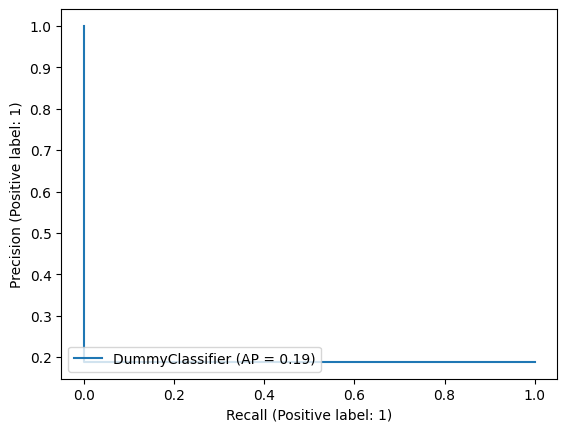

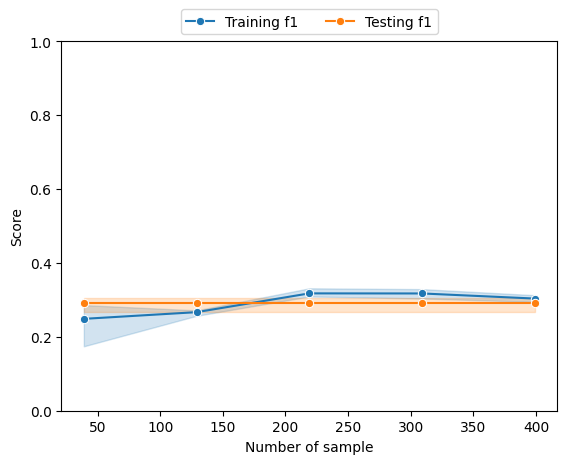

In [69]:
#baseline model i.e. dummy classifier that predict either otucome by 50% chance
dummy_clf = DummyClassifier(strategy="uniform", random_state=1023)
dummy_clf.fit(X_train, y_train)

#predict on train set again
y_pred_dummy = dummy_clf.predict(X_train)

#obtain evaluation metrics
my_report(X_train, y_train, y_pred_dummy, dummy_clf)
plot_learning_curve(X_train, y_train, dummy_clf)

### Comparison Model--Decision Tree

{'class_weight': {1: 3.896551724137931}, 'criterion': 'entropy', 'max_depth': 6}
0.4814449759509702
Confusion matrix: 
 [[320  85]
 [ 11  83]]
Training f1 score is 0.634
Cross-validated f1 score is 0.481 +/- 0.077


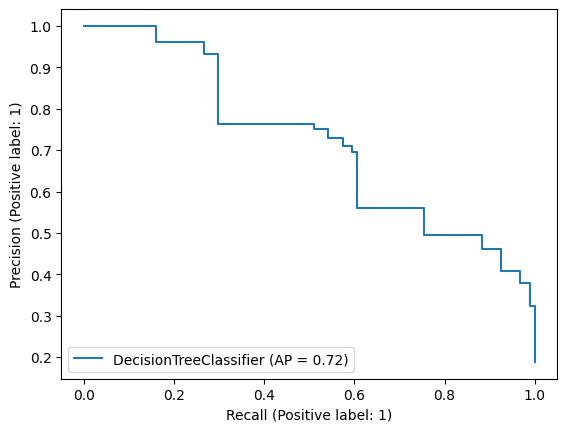

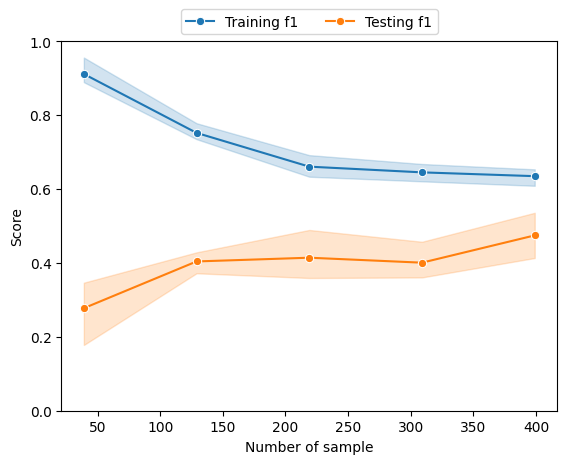

In [70]:
#comparison model i.e.Decision Tree
dt = DecisionTreeClassifier(random_state=1023)

#define the searching grid
param_grid = {"max_depth":np.linspace(2,6,5).astype(int), 
"class_weight":[{1:i} for i in np.linspace(1,4,30)], 
"criterion" : ("gini", "entropy")}

#gridsearch CV using f1 as scoring method
gscv_dt = GridSearchCV(dt, param_grid, scoring='f1')
gscv_dt.fit(X_train, y_train)

#extract the best estimator
print(gscv_dt.best_params_)
print(gscv_dt.best_score_)
dt_best = gscv_dt.best_estimator_

#predict on train set again
y_pred_train = dt_best.predict(X_train)

#obtain evaluation metrics
my_report(X_train, y_train, y_pred_train, dt_best)
plot_learning_curve(X_train, y_train, dt_best)

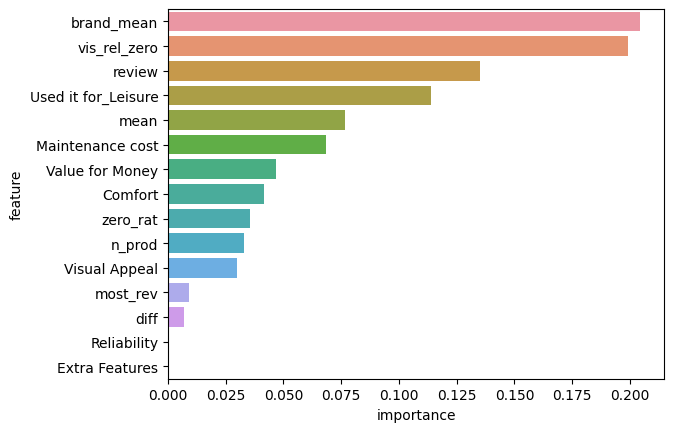

In [71]:
#obtain feature importances defined decrease in impurity
fi_imp = pd.DataFrame({"feature":X_train.columns, "importance":dt_best.feature_importances_}).sort_values("importance", ascending=False)
sns.barplot(y="feature", x="importance", data=fi_imp)
plt.show()

In [72]:
#obtain permutation feature importance
pfi(dt_best, X_train, y_train)

brand_mean               0.110 +/- 0.017
review                   0.067 +/- 0.011
vis_rel_zero             0.033 +/- 0.013
Used it for_Leisure      0.031 +/- 0.006
zero_rat                 0.024 +/- 0.008
Value for Money          0.022 +/- 0.008
Visual Appeal            0.014 +/- 0.004
Maintenance cost         0.013 +/- 0.006


## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

As class imbalance occurs(only below 20% of data is positive label), f1 is preferred to accuracy as the suitable scoring method, as it can better reveal the average recall and precision of the model.

For dummy classifier, the f1 score for both train set and test set are 0.268, which is mainly due to the large amount of missclasification of class 0 (real comments).

On the other hand, for decision tree, the f1 score for train set is 0.634, validated as 0.481 +/- 0.07. The f1 score on test set is 0.412.

By comparing the f1 scores on test set, decision tree model shows nearly 15% of improvement in prediciting ability.
Therefore, it is consider f1 is a better performing approach.

In [73]:
#predict test set using baseline model
y_pred_dummy = dummy_clf.predict(X_test)
print("Confusion matrix: \n {}".format(confusion_matrix(y_test,y_pred_dummy)))
print(f"Test f1 score is {np.round(f1_score(y_test,y_pred_dummy),3)}")

Confusion matrix: 
 [[91 82]
 [22 19]]
Test f1 score is 0.268


In [74]:
#predict test set using decision tree and obtain my report
y_pred_dt = dt_best.predict(X_test)
print("Confusion matrix: \n {}".format(confusion_matrix(y_test,y_pred_dt)))
print(f"Test f1 score is {np.round(f1_score(y_test,y_pred_dt),3)}")

Confusion matrix: 
 [[133  40]
 [ 20  21]]
Test f1 score is 0.412


## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study